# Stance Classification In Tweets

In [1]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE
import IPython.display as display
from PIL import Image
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Convolution2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
tf.keras.optimizers.RMSprop
get_ipython().run_line_magic('matplotlib', 'inline')
import os
tf.__version__

Using TensorFlow backend.


'2.1.0'

## Upload and unzip data file

In [2]:
import zipfile
with zipfile.ZipFile('./StanceDataset.zip', 'r') as zip_ref:
 zip_ref.extractall('./')

## Reading training data

In [3]:
train = pd.read_csv('./StanceDataset/train.csv', index_col=None, header=0, engine='python' )

## Understand Data and Preprocessing

In [4]:
train.head()

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,"@tedcruz And, #HandOverTheServer she wiped cle...",Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
1,Hillary is our best choice if we truly want to...,Hillary Clinton,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
2,@TheView I think our country is ready for a fe...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
3,I just gave an unhealthy amount of my hard-ear...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,@PortiaABoulger Thank you for adding me to you...,Hillary Clinton,NONE,3. The tweet is not explicitly expressing opi...,pos


#understand shape of dataframe

In [5]:
train.shape

(2914, 5)

## Checking shape of training data and creating a plot to analyse Bias in data

In [6]:
#grouping
shape_data_group= train.groupby(["Stance"])
shape_data_group_plot= shape_data_group.count()

,Tweet,Target,Opinion Towards,Sentiment
Stance,,,,
AGAINST,1395,1395,1395,1395
FAVOR,753,753,753,753
NONE,766,766,766,766


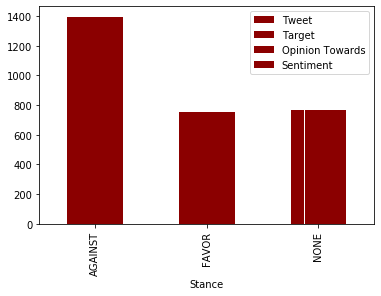

In [7]:
#plotting bar chart
shape_data_group_plot.plot(kind='bar',color=('darkred'))
shape_data_group.count()

## Splitting Data into TRAIN, TEST AND VALIDATION

In [8]:

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(train,test_size = 0.2)
training_data, validation_data = train_test_split(train_data,test_size = 0.2)

# Generate two data frames for training and validation #
print('Train size: {}, Test size: {}'.format(training_data.shape[0], validation_data.shape[0] ) ) 
N_train_images = training_data.shape[0]
N_val_images = validation_data.shape[0]

Train size: 1864, Test size: 467


In [9]:
training_data.shape

(1864, 5)

In [10]:
validation_data.shape

(467, 5)